<a href="https://colab.research.google.com/github/Vinicius-Said/Python-/blob/main/Wine_SVM_Eng_Software_Vincius_Said_e_Eduardo_Darwich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Vinhos com SVM

Este notebook demonstra a implementação de um modelo de Support Vector Machine (SVM) para prever a presença de diabetes em pacientes com base em dados clínicos. Utilizamos o conjunto de dados "Wine Database". Agora, vamos testar diferentes kernels e usar GridSearchCV para otimizar os hiperparâmetros C e gamma.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_wine


## 2. Carregamento e Exploração dos Dados

Vamos carregar o conjunto de dados e fazer uma exploração inicial para entender suas características.

In [ ]:
wine = load_wine()
#print(wine)
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target
df.head(5)



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 3. Pré-processamento dos Dados
Precisamos preparar os dados para alimentar o modelo SVM. Isso inclui a normalização dos dados e a separação em conjunto de treino e teste.

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Treinamento do Modelo SVM
Vamos treinar o modelo SVM com kernel linear para tentar prever o resultado com base nas variáveis padronizadas.

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

## 5. Avaliação do Modelo
Após treinar o modelo, vamos avaliá-lo usando a matriz de confusão e o relatório de classificação.

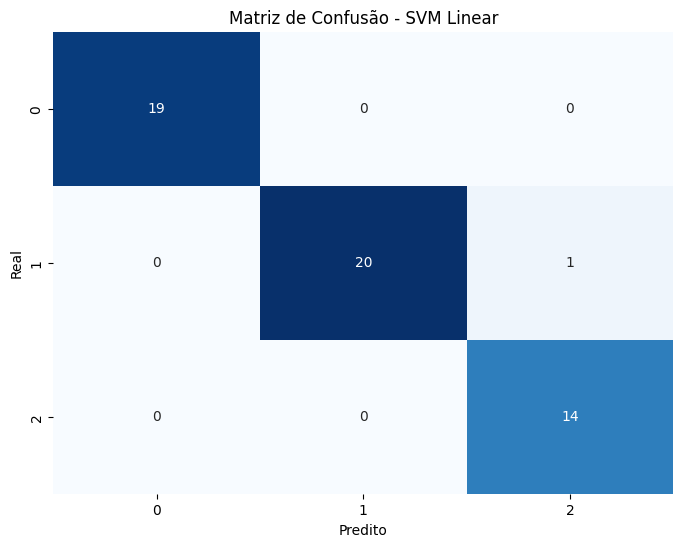

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

## 6. Testando Diferentes Kernels e Ajustando C e Gamma com GridSearchCV
Agora, vamos testar diferentes kernels, como o RBF e o polinomial, e ajustar os hiperparâmetros C e gamma usando o GridSearchCV.

In [ ]:
# Definir os parâmetros para o GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Instanciar o modelo SVM
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

### Melhores parâmetros encontrados pelo GridSearchCV

In [ ]:
# Exibir os melhores parâmetros
print('Melhores parâmetros: ', grid.best_params_)
print('Melhor estimador: ', grid.best_estimator_)

Melhores parâmetros:  {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Melhor estimador:  SVC(C=1, gamma=1, kernel='linear')


### Avaliação do Modelo Otimizado
Agora vamos usar o melhor modelo encontrado para avaliar o desempenho nos dados de teste.

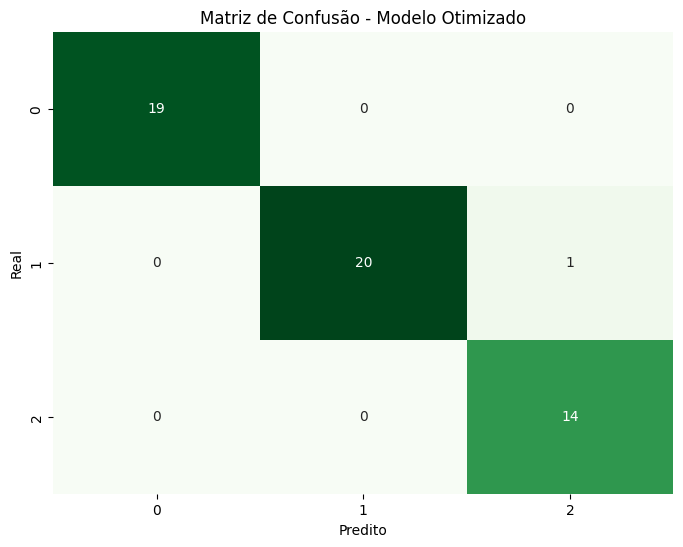

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
# Previsões com o modelo otimizado
grid_predictions = grid.predict(X_test_scaled)

# Matriz de confusão e relatório de classificação
conf_matrix_grid = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_grid, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão - Modelo Otimizado')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, grid_predictions))

### Conclusão
Com a utilização do GridSearchCV, conseguimos otimizar os hiperparâmetros do modelo SVM e obter uma melhoria no desempenho da classificação. Testamos diferentes kernels e os hiperparâmetros C e gamma, sendo o kernel RBF o melhor entre os testados.